# i. Introduction

- Nama  : Muhammad Zhafir Abdurrahman

Source: [Dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/)

Problem Statement

Depresi merupakan salah satu gangguan kesehatan mental yang semakin sering terjadi dikalangan pelajar. Depresi tidak hanya menyebabkan masalah pada kesehatan mental tapi juga dapat berpengaruh pada kegiatan sehari-hari, hal yang terdekat pada pelajar adalah penurunan performa akademik, burnout, bahkan tidak ingin melanjutkan studi-nya (_drop out_). Sehingga depresi ini harus ditangani dengan baik untuk menghindari risiko risiko yang kemungkinan akan terjadi dimasa depan, salah satunya adalah dengan mendeteksi awal (_screening_) mengenai apakah pelajar berpotensi mengalami depresi atau tidak.

Objective
- Memprediksi apakah pelajar tersebut masuk dalam kategori depresi atau tidak depresi dengan menggunakan Decision Tree, Logistic Regression, Random Forest, Support Vector Classifier dan XGBoost dan akan dievaluasi dengan metrics Recall dikarenakan ingin mengurangi False Negative yang bertujuan untuk menangkap sebanyak mungkin pelajar yang berisiko depresi.

Dataset Information
- ID        : Unique identifier untuk setiap murid pada dataset
- Gender    : Gender pada pelajar (Male, Female)
- Age       : Umur pelajar dalam tahun
- City      : Kota tempat pelajar tinggal
- Profession: Pekerjaan yang dilakukan pelajar (ada beberapa pelajar memiliki pekerjaan sampingan)
- Academic Pressure : Ukuran tingkat tekanan yang dialami pelajar dalam konteks kegiatan belajar mengajar (ulangan, tugas, ekspektasi nilai hasil belajar)
- Work Pressure : Tingkat stress yang berkaitan dengan kegiatan pekerjaan
- CGPA      : Nilai rata-rata kumulatif dari semua mata pelajaran
- Study Satisfaction    : Indikator kepuasan pelajar dalam kegiatan belajar
- Job Satisfaction  : Pengukuran tingkat kepuasan dalam pekerjaan
- Sleep Duration    : Rata-rata durasi tidur per hari
- Dietary Habits    : Penilaian hasil pola makan dan nutrisi yang dikonsumsi oleh pelajar
- Degree    : Tingkatan akademik pelajar
- Have You Ever Had Suicidal Thoughts   : Indikator biner (Yes/No) apakah pelajar pernah berpikiran untuk mengakhiri hidupnya
- Work/Study Hours  : Rata-rata pelajar melakukan kegiatan belajar dalam satuan jam
- Finacial Stress   : Pengukuran tingkat stress berdasarkan aspek ekonomi
- Family History of Mental Illness : Indikasi apakah ada anggota keluarga yang mempunyai riwayat mental illness
- Derpression   : Target variable yang mengindikasikan bahwa pelajar sedang mengalami depresi atau tidak.



# ii. Import Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr



# iii. Data Loading

In [119]:
# Load Dataset
df = pd.read_csv('student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [120]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [121]:
# Check Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Pada nama kolom `Have you ever had suicidal thoughts ?` terlalu panjang dan tidak konsisten terhadap kolom lainnya karena bersifat pertanyaan sehingga akan diubah menjadi `Suicidal Thoughts`

In [122]:
# Rename Column
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)

In [123]:
# Check Column Name After Rename
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [124]:
# Check Categorical Column and Numerical Column
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Suicidal Thoughts', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')
Numerical Columns: Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Depression'],
      dtype='object')


In [125]:
# Check Value Count On Each Categorical Column
for col in cat_cols:
    print(f'{df[col].value_counts()}\n')

Gender
Male      15547
Female    12354
Name: count, dtype: int64

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
C

Terdapat simbol kutip yang tidak perlu dalam kolom `City`, `Profession`, `Sleep Duration`, dan `Degree` sehingga akan dilakukan penghapusan

In [126]:
# Delete (') from the column
df['City'] = df['City'].str.strip("'")
df['Profession'] = df['Profession'].str.strip("'")
df['Sleep Duration'] = df['Sleep Duration'].str.strip("'")
df['Degree'] = df['Degree'].str.strip("'")

Pada kolom `City` masih terdapat nilai yang tidak valid seperti `3.0`, `Less Delhi` dan sebabagainya sehingga akan diubah nilainya

In [127]:
# Creating a list of non-city values in the 'City' column
non_city= ['Saanvi', 'M.Tech', 'Bhavna', "Less Delhi",'City', '3.0', "Less than 5 Kalyan", 
           'Mira', 'Harsha', 'Vaanya','Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
           'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad']

# replacing values that are inferred to be related to a city
df['City'] = df['City'].str.replace("Less than 5 Kalyan", "Kalyan")
df['City'] = df['City'].str.replace('Nalyan', "Kalyan")
df['City'] = df['City'].str.replace("Less Delhi", "Delhi")
df['City'] = df['City'].str.replace('Khaziabad', "Ghaziabad")

# Iterating through the non-city list and replacing the values with the value "unknown"
for val in non_city:
    df['City'] = df['City'].str.replace(val, "Unknown")

df['City'].value_counts()

City
Kalyan           1572
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             769
Bangalore         767
Ghaziabad         746
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Unknown            22
Name: count, dtype: int64

In [128]:
# Check Value Count on Financial Stress Column
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

Masih terdapat kesalahan tipe data pada kolom `Financial Stress`, kolom ini berisi nilai tingkatan financial stress yang ditunjukan dalam angka sehingga akan diubah menjadi tipe integer, kolom berubah menjadi _object_ dikarenakan ada value `?` sehingga akan diubah berdasarkan nilai mediannya

In [129]:
# Change '?' to its median
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5229
1.0    5121
2.0    5061
Name: count, dtype: int64

In [130]:
# Check Shape
df.shape

(27901, 18)

In [131]:
# Checking Missing Value
df.isnull().sum()

id                                  0
Gender                              0
Age                                 0
City                                0
Profession                          0
Academic Pressure                   0
Work Pressure                       0
CGPA                                0
Study Satisfaction                  0
Job Satisfaction                    0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
Suicidal Thoughts                   0
Work/Study Hours                    0
Financial Stress                    0
Family History of Mental Illness    0
Depression                          0
dtype: int64

In [132]:
# Check value counts on Job Satisfaction Column
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [133]:
# Check value counts on Work Pressure column
df['Work Pressure'].value_counts()

Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [134]:
# Check Depression Value
df['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [135]:
# Statistic Descriptive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27901.0,3.139852,1.437270,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


- Pada dataset ini menggunakan 27901 pelajar yang berlokasi di India, umur pelajar berkisar 18-59 tahun dengan rata-rata umur 25 tahun. Terdapat umur pelajar lebih dari 25 tahun, hal ini menandakan bahwa dataset ini tidak hanya mengambil data pelajar tingkat sekolah, tetapi juga mengambil data dari mahasiswa yang sedang belajar hingga tingkat Doctoral
- Berdasarkan kolom `Study Hours` terlihat bahwa rata-rata jam belajarnya adalah 8 jam sehari.
- Terlihat juga bahwa pelajar yang mengalami depresi lebih banyak dibandingkan dengan yang tidak depresi.
- Ada kolom yang tidak relevan pada dataset ini diantaranya adalah kolom `Job Satisfaction` dan `Work Pressure` karena dataset ini mengenai tingkat depresi pada pelajar, dapat dilihat juga bahwa hanya sedikit yang memberi nilai selain 0 pada kolom tersebut sehingga untuk kedepannya akan dilakukan drop pada proses Feature Engineering.

# iv. Exploratory Data Analysis

## 1. Mengetahui jumlah tingkat depresi berdasarkan gender

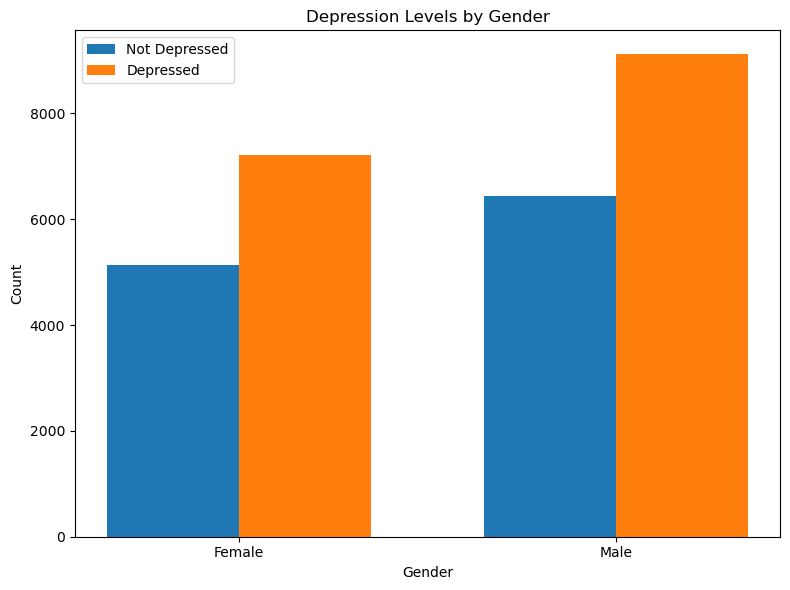

In [136]:
# Grouping data
ct = df.groupby(['Gender', 'Depression']).size().unstack()

# Define bar positions
labels = ct.index
not_dep = ct[0]
dep = ct[1]

x = np.arange(len(labels)) 
width = 0.35 

# Plot side-by-side bar chart
plt.figure(figsize=(8,6))
plt.bar(x - width/2, not_dep, width, label='Not Depressed')
plt.bar(x + width/2, dep, width, label='Depressed')

# Labels & Title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Depression Levels by Gender')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()

plt.show()

Berdasarkan side by side chart menunjukan bahwa pelajar yang mengalami depresi lebih banyak dibandingkan yang tidak depresi, baik itu pada perempuan dan laki-laki

## 2. Grafik distrribusi untuk tiap jenis kolom

### Numerical Column

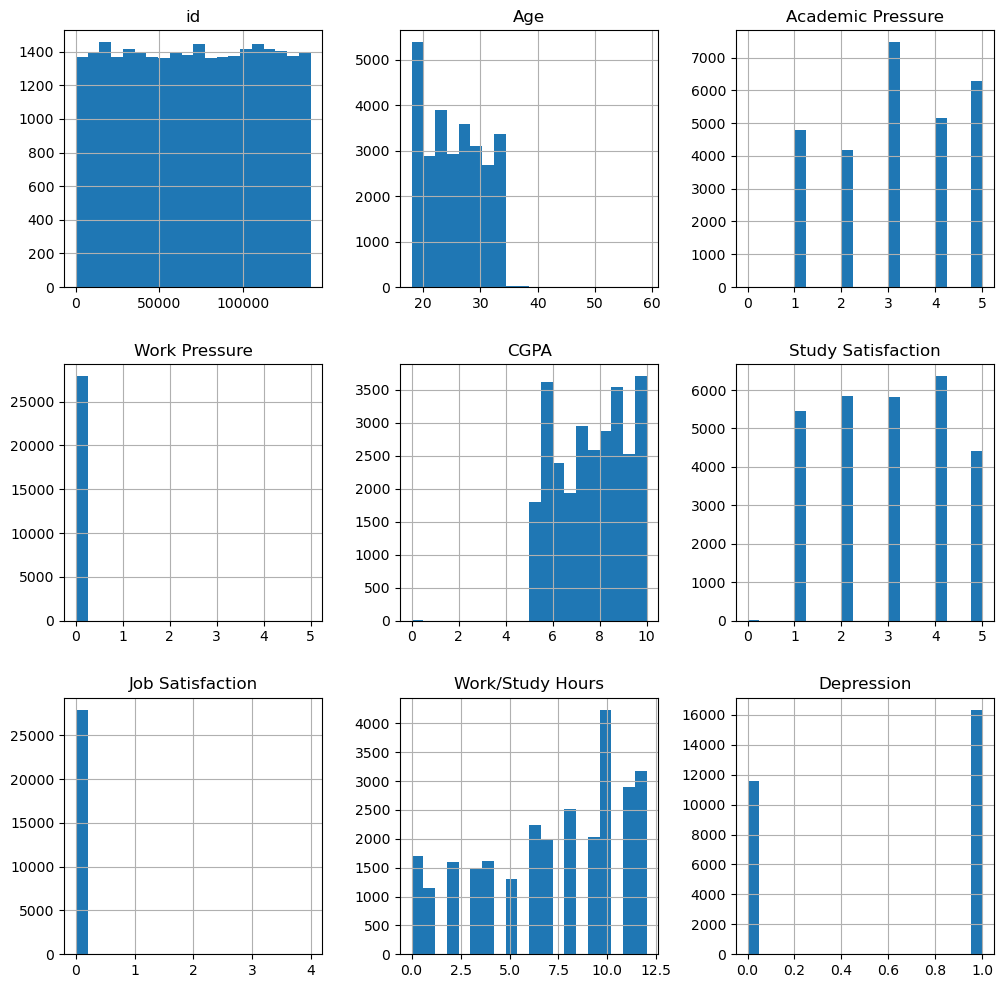

In [137]:
# Create Histogram and Scatter Plot for exploration

df[num_cols].hist(figsize=(12,12),bins=20)
plt.show()

### Categorical Column

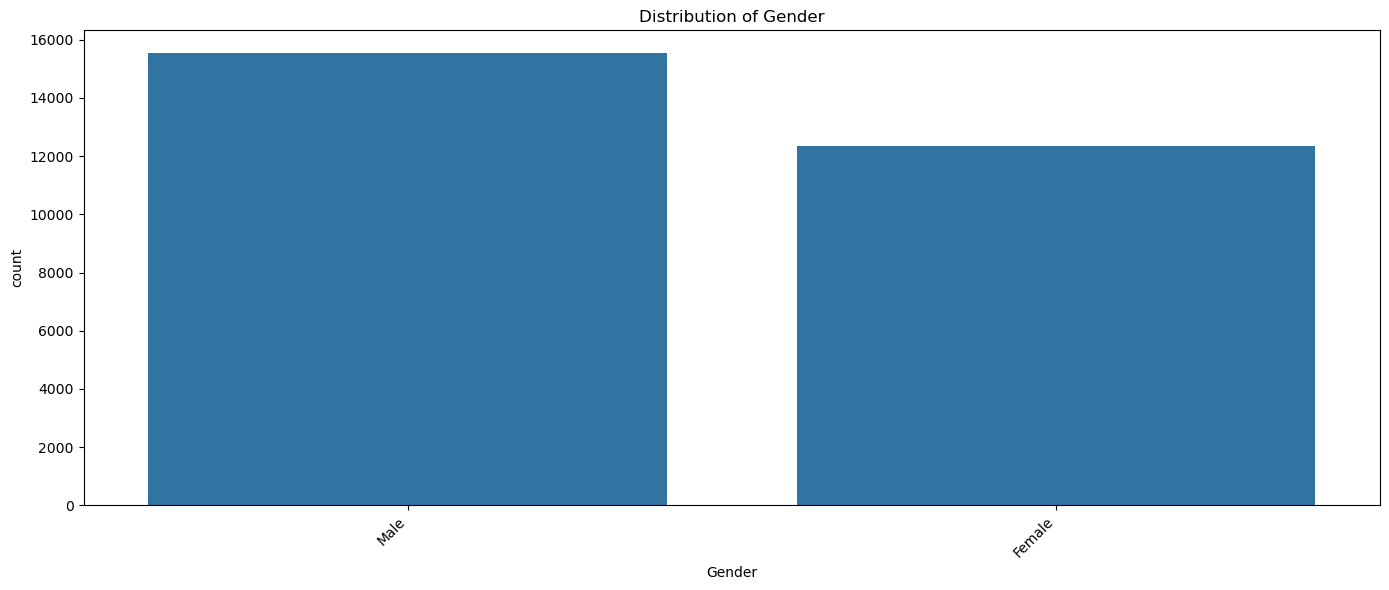

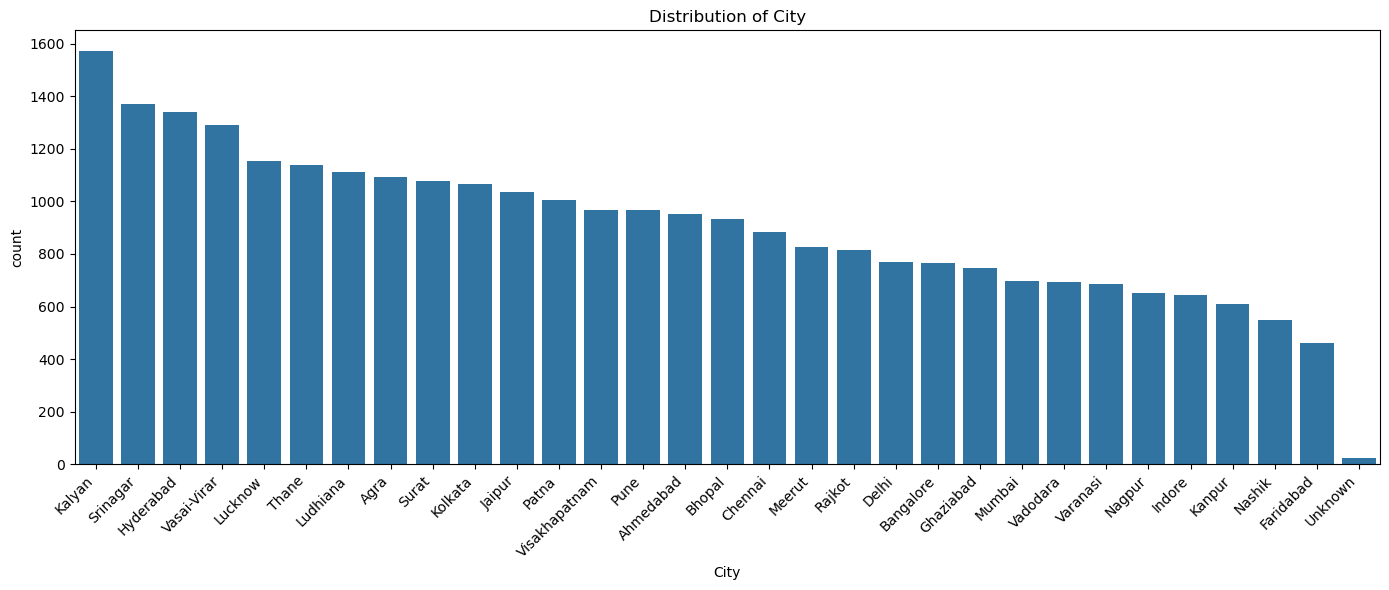

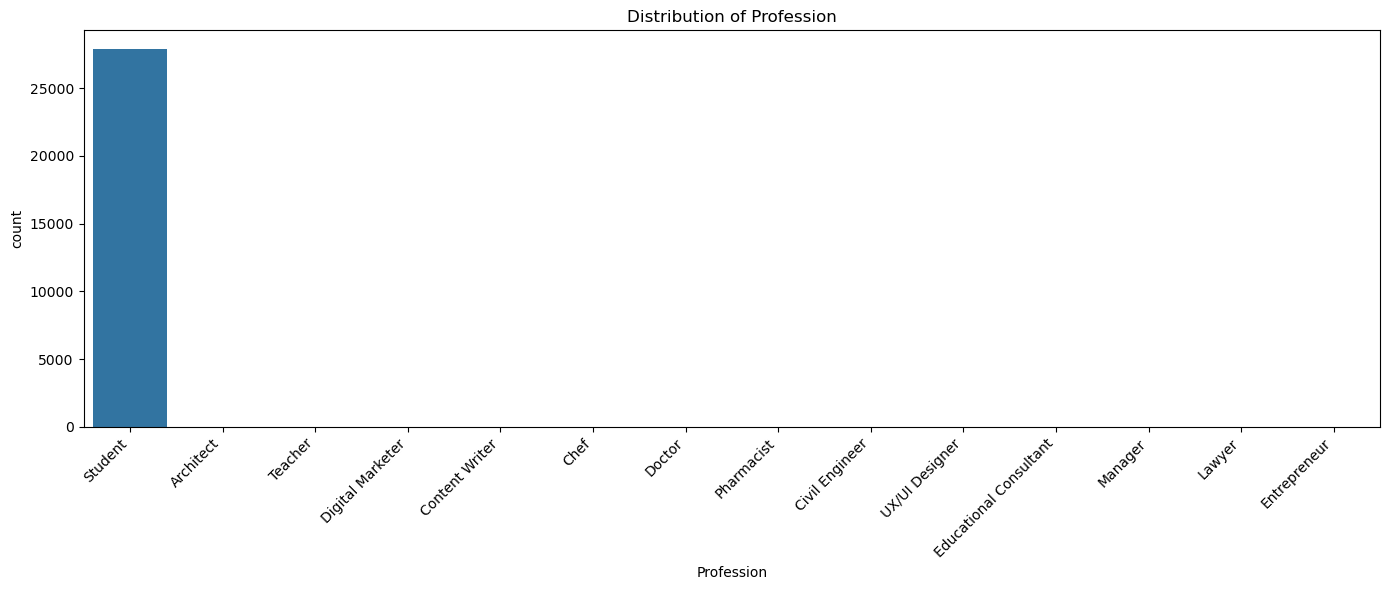

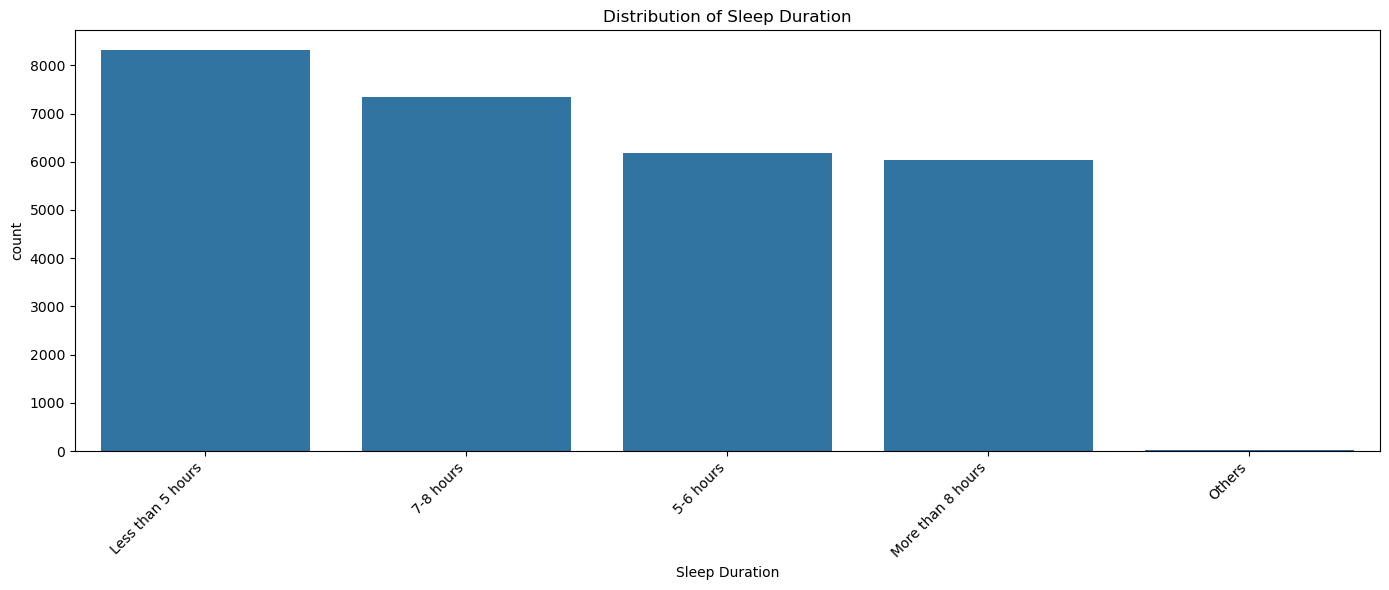

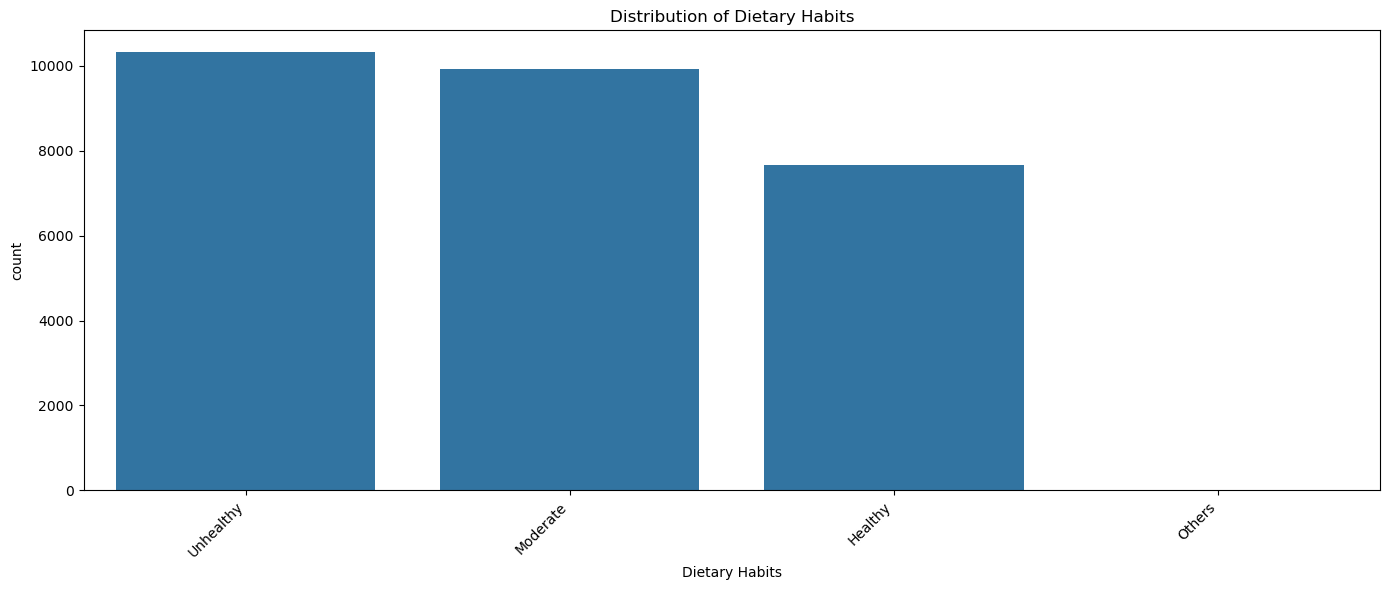

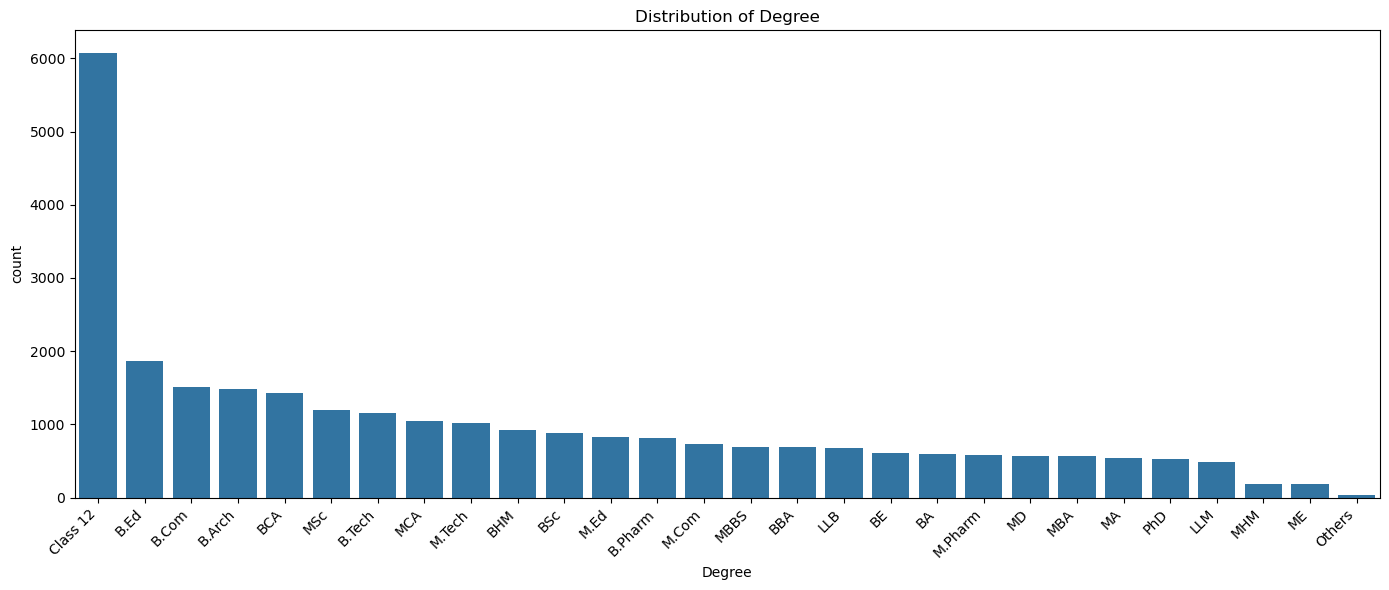

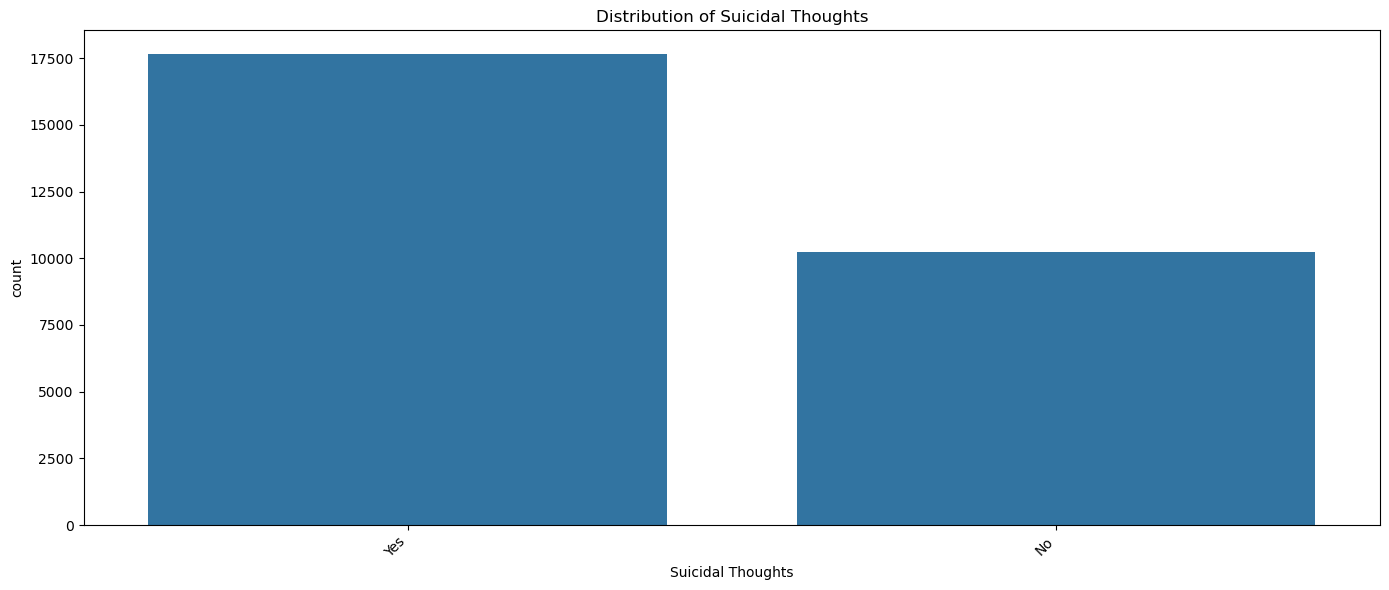

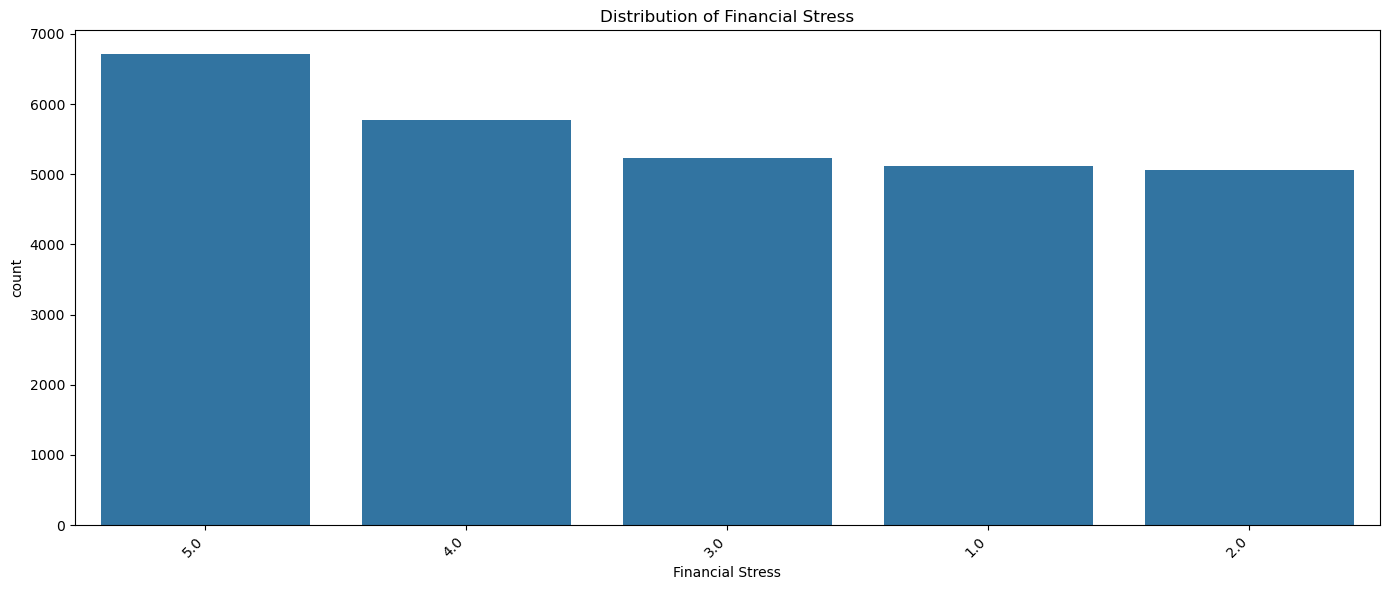

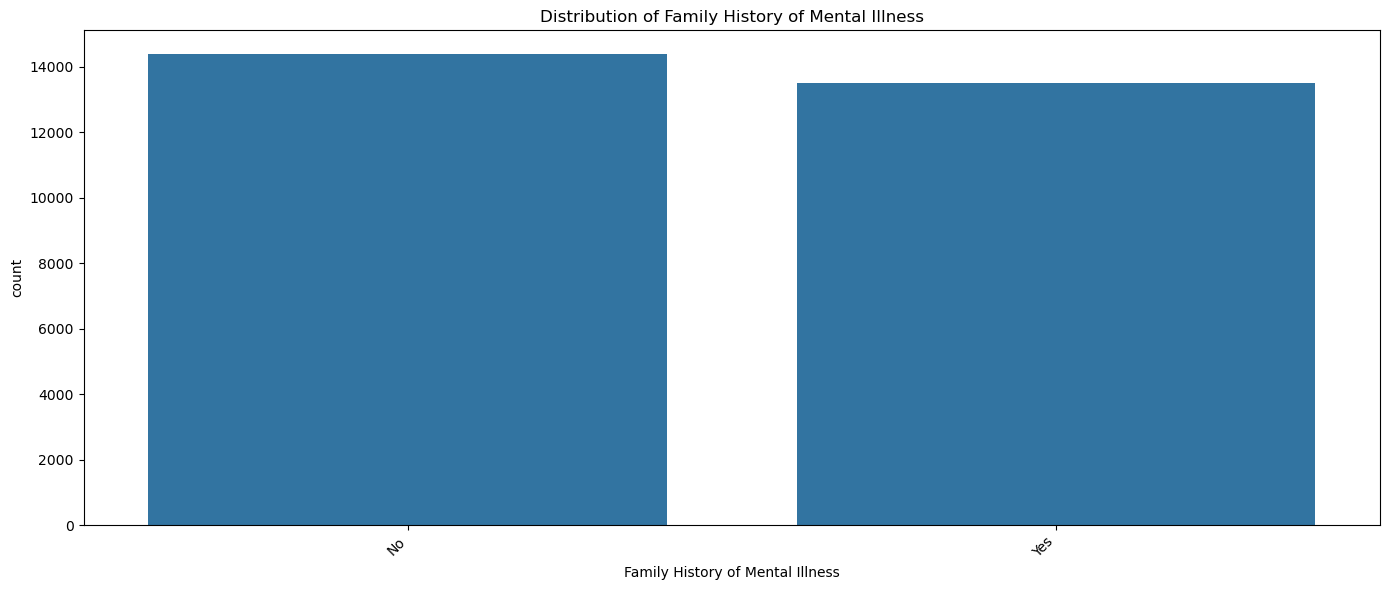

In [138]:
# Membuat Bar Chart untuk tiap kategorikal kolom
for col in cat_cols:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)

    plt.xticks(rotation=45, ha='right')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


## 3. Insight berdasarkan bar-chart diatas adalah bahwa pelajar yang tidur kurang dari 5 jam sehari memiliki jumlah terbanyak, berdasarkan penelitian yang dilakukan pada mahasiswa UDAYANA yang ditulis pada [jurnal](https://download.garuda.kemdikbud.go.id/article.php?article=884467&val=13954&title=KORELASI%20KUALITAS%20TIDUR%20TERHADAP%20TINGKAT%20DEPRESI%20CEMAS%20DAN%20STRES%20MAHASISWA%20KEDOKTERAN%20UNIVERSITAS%20UDAYANA%20BALI) ini, menunjukan bahwa semakin buruk kualitas tidur mahasiswa, maka semakin tinggi tingkat depresi, cemas, atau stres yang dialami. Oleh sebab itu akan dicoba uji korelasi antara kolom `Sleep Duration` dan `Depression` dengan chi-square.

Tabel Kontingensi:
Depression            0     1
Sleep Duration               
5-6 hours          2666  3517
7-8 hours          2975  4371
Less than 5 hours  2949  5361
More than 8 hours  2966  3078
Others                9     9

Hasil Uji Chi-Square
Chi-square: 276.8483796551745
p-value: 1.065310789284643e-58
Derajat kebebasan: 4
Expected frequencies:
 [[2562.86136698 3620.13863302]
 [3044.92634673 4301.07365327]
 [3444.50557328 4865.49442672]
 [2505.24569012 3538.75430988]
 [   7.4610229    10.5389771 ]]


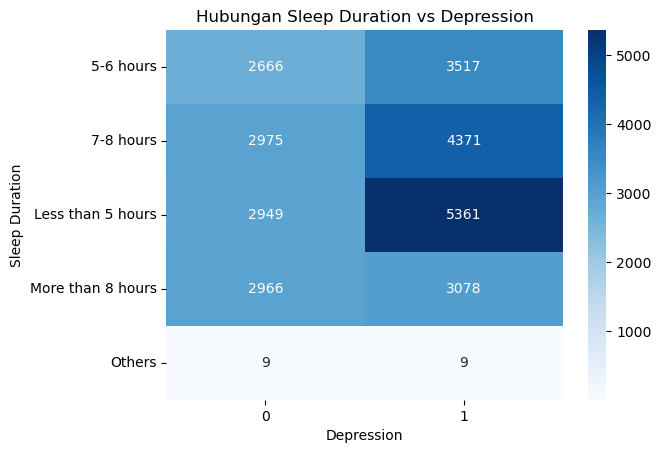

In [139]:
# Tabel Kontingensi
ct = pd.crosstab(df['Sleep Duration'], df['Depression'])

print("Tabel Kontingensi:")
print(ct)

#Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(ct)

print("\nHasil Uji Chi-Square")
print("Chi-square:", chi2)
print("p-value:", p)
print("Derajat kebebasan:", dof)
print("Expected frequencies:\n", expected)

# Visualisasi heatmap
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Hubungan Sleep Duration vs Depression")
plt.show()

Berdasarkan uji korelasi dengan chi-square menujukan nilainya sebesar 276,85 dengan p-value sebesar 1.065310789284643e-58 (< 0,05) maka dapat disimpulkan bahwa terdapat hubungan yang signifikan antara durasi tidur dengan tingkat stress seperti pada jurnal diatas

## 4. Uji korelasi apakah pelajar yang melakukan kegiatan belajar lebih panjang akan memiliki CGPA yang lebih baik juga?

In [140]:
# Korelasi Pearson
pearson_corr, pearson_p = pearsonr(df['Work/Study Hours'], df['CGPA'])

# Korelasi Spearman
spearman_corr, spearman_p = spearmanr(df['Work/Study Hours'], df['CGPA'])

print("=== Korelasi Pearson ===")
print("Correlation:", pearson_corr)
print("p-value:", pearson_p)

print("\n=== Korelasi Spearman ===")
print("Correlation:", spearman_corr)
print("p-value:", spearman_p)

=== Korelasi Pearson ===
Correlation: 0.0026041970795641226
p-value: 0.6635800549568865

=== Korelasi Spearman ===
Correlation: 0.0031286516687321652
p-value: 0.6012699800409034


Berdasarkan hasil uji korelasi dengan menggunakan metode pearson dan spearman menunjukan bahwa tidak ada korelasi antara lama belajar dengan CGPA

## 5. Apakah ada korelasi antara `Academic Pressure` dengan `Depression`

Tabel Kontingensi:
Depression            0     1
Academic Pressure            
0.0                   5     4
1.0                3869   932
2.0                2612  1566
3.0                2973  4489
4.0                1230  3925
5.0                 876  5420

Hasil Uji Chi-Square
Chi-square: 6427.249219373416
p-value: 0.0
Derajat kebebasan: 5


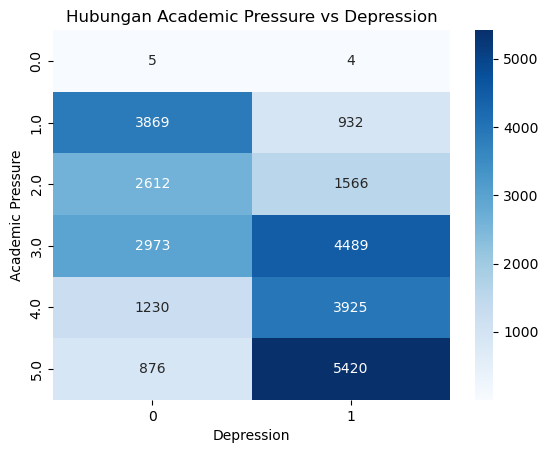

In [141]:
# Buat tabel kontingensi
ct = pd.crosstab(df['Academic Pressure'], df['Depression'])

print("Tabel Kontingensi:")
print(ct)

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(ct)

print("\nHasil Uji Chi-Square")
print("Chi-square:", chi2)
print("p-value:", p)
print("Derajat kebebasan:", dof)

# Visualisasi
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Hubungan Academic Pressure vs Depression")
plt.show()

Berdasarkan uji korelasi dengan chi-square menujukan bahwa chi-squre bernlai 6427.25 dengan p-value nya 0.0 hal ini menunjukan bahwa semakin tinggai tingkat academic pressure maka semakin berpotensi pelajar juga mengalami depressi

## 6. Apakah study satisfaction memiliki hubungan yang linear dengan CGPA?

In [142]:
corr, p_value = spearmanr(df['Study Satisfaction'], df['CGPA'])

print("Spearman Correlation:", corr)
print("p-value:", p_value)

Spearman Correlation: -0.04608185108778268
p-value: 1.3493085079184857e-14


Berdasarkan uji korelasi dengan metode spearman, menujukan bahwa korelasi sangat kecil sehingga hubungan antara kolom tersebut sangat lemah, sehingga siswa yang sangat puas dengan masa belajarnya tidak menentukan akan mendapatkan CGPA yang tinggi juga

## 7. Apakah tingkat Financial Stress dapat memprediksi peluang seseorang mengalami depresi?

Tabel Kontingensi:
Depression           0     1
Financial Stress            
1.0               3489  1632
2.0               2886  2175
3.0               2148  3081
4.0               1785  3990
5.0               1257  5458

Hasil Uji Chi-Square
Chi-square: 3702.294039356707
p-value: 0.0
Derajat kebebasan: 4


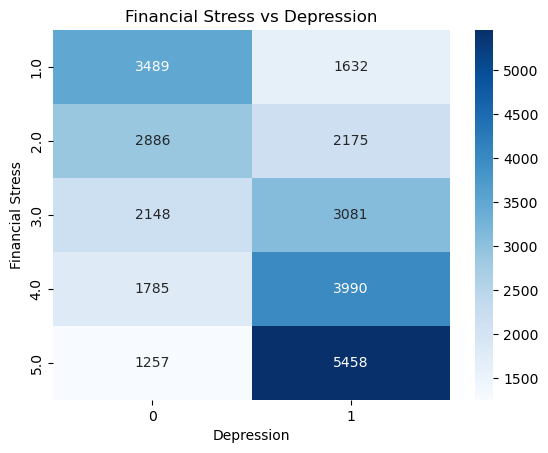

In [143]:
# Tabel kontingensi
ct = pd.crosstab(df['Financial Stress'], df['Depression'])

print("Tabel Kontingensi:")
print(ct)

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(ct)

print("\nHasil Uji Chi-Square")
print("Chi-square:", chi2)
print("p-value:", p)
print("Derajat kebebasan:", dof)

# Visual
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Financial Stress vs Depression")
plt.show()

Berdasarkan uji chi-square menunjukan bahwa terdapat hubungan yang signifikan antara financial stress dengan depresi pada pelajar (chi-square = 3702.29, p < 0.001). Dengan demikian financial stress merupakan faktor yang sangat berpengaruh terhadap risiko depresi

## Kesimpulan EDA

Variabel yang sangat mempengaruhi tingkat depresi pada pelajar adalah `Academic Pressure`,`Financial Stress` dan `Sleep Duration` yang dibuktikan dengan hubungan yang sangat signifikan dan berkorelasi positif. Sedangkan uji korelasi untuk menentukan faktor yang mempengaruhi CGPA pada variabel `Study Satisfaction` dan `Study Duration` menunjukan rendahnya korelasi antar variabel tersebut

# v. Feature Engineering

## 1. Split X and y

In [144]:
# X = Feature and y = Target
X = df.drop('Depression', axis=1)
y = df['Depression']

In [145]:
# Check Shape
X.shape, y.shape

((27901, 17), (27901,))

In [146]:
# Check Feature Dataset
X

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No


## 2. Split Numerical and Categorical Columns

In [147]:
# Split Numerical Column and Categorical Column
num_cols = ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
cat_cols = ['Gender','City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts', 'Family History of Mental Illness']

## 3. Cardinality Handling

In [148]:
# Category Column Analysis
for i in cat_cols:
    print(f'Jumlah unique value dari kolom {i} : {df[i].nunique()}')
    print(f'Unique value dari kolom {i} : {df[i].unique()}')
    print('')

Jumlah unique value dari kolom Gender : 2
Unique value dari kolom Gender : ['Male' 'Female']

Jumlah unique value dari kolom City : 31
Unique value dari kolom City : ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Unknown']

Jumlah unique value dari kolom Profession : 14
Unique value dari kolom Profession : ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Jumlah unique value dari kolom Sleep Duration : 5
Unique value dari kolom Sleep Duration : ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']

Jumlah unique value dari kolom Dietary Habits : 4


Unique value dari kolom Dietary Habits : ['Healthy' 'Moderate' 'Unhealthy' 'Others']

Jumlah unique value dari kolom Degree : 28
Unique value dari kolom Degree : ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']

Jumlah unique value dari kolom Suicidal Thoughts : 2
Unique value dari kolom Suicidal Thoughts : ['Yes' 'No']

Jumlah unique value dari kolom Family History of Mental Illness : 2
Unique value dari kolom Family History of Mental Illness : ['No' 'Yes']



Berdasarkan hasil analisis diatas menunjukan bahwa pada kolom `City`, `Profession`, dan `Degree` memiliki banyak distinc values sehingga masuk dalam kategori __High Cardinality__ sehingga akan dilakukan handling cardinality pada kolom tersebut

### a. Kolom City

Pada kolom `City` akan dilakukan _grouping_ dengan cara membagi 5 wilayah besar di India (North, South, East, West dan Central)

In [149]:
# Make Dictionary for Mapping
city_to_region = {
    'North':{'Delhi', 'Lucknow', 'Srinagar', 'Meerut', 'Ghaziabad', 'Ludhiana','Agra', 'Kanpur', 'Faridabad'},
    'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'},
    'East':{'Kolkata', 'Patna', 'Varanasi'},
    'West':{'Mumbai', 'Thane', 'Pune', 'Ahmedabad', 'Rajkot', 'Vadodara', 'Kalyan', 'Nashik','Jaipur','Surat'},
    'Central':{'Indore', 'Bhopal', 'Nagpur'}
}

In [150]:
# Membuat Function untuk mengubah city menjadi region
class CityToRegionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mapping):
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["Region"] = X["City"].map(self.mapping).fillna("Other")
        return X

### b. Kolom Degree

In [151]:
# Check Unique Value
df.Degree.unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [152]:
# Make Mapping for Degree
degree_map = {'Class 12': 'High School',
    'B.Ed': 'Bachelor', 'B.Com': 'Bachelor', 'B.Arch': 'Bachelor', 'BCA': 'Bachelor', 'B.Tech': 'Bachelor',
    'BHM': 'Bachelor', 'BSc': 'Bachelor', 'B.Pharm': 'Bachelor', 'BBA': 'Bachelor', 'LLB': 'Bachelor', 'BE': 'Bachelor', 'BA': 'Bachelor', 'MBBS': 'Bachelor',

    'M.Tech': 'Master', 'M.Ed': 'Master', 'MSc': 'Master', 'MCA': 'Master', 'MA': 'Master', 'MBA': 'Master', 'M.Com': 'Master', 'ME': 'Master', 'MHM': 'Master', 'M.Pharm': 'Master', 'LLM': 'Master',

    'PhD': 'Doctorate', 'MD': 'Doctorate'}


In [153]:
# Membuat Function untuk mengubah Degree
class DegreeMappingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mapping):
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["Degree Group"] = X["Degree"].map(self.mapping).fillna(0)
        return X

### c. Kolom Profession

In [154]:
# Check value counts in Profession
df.Profession.value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [155]:
# Membuat function untuk mengubah profession
class ProfessionBinaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass 

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["Profession"] = X["Profession"].apply(
            lambda x: "student" if x == "Student" else "other"
        )
        return X

## 4. Split Between Train and Test Set

In [156]:
#Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify=y)
print('Train Size: ', X_train.shape) 
print('Test Size: ', X_test.shape) 

Train Size:  (22320, 17)
Test Size:  (5581, 17)


## 5. Handling Outlier

In [157]:
# Check Skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

In [158]:
print(num_cols)

['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [159]:
# Melihat hasil skewness
skewness_results = check_skewness(X_train, 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

Age: 0.12678833619399132
Academic Pressure: -0.1353261101903975
Work Pressure: 149.39879517586485
CGPA: -0.110613889548256
Study Satisfaction: 0.009893228549769406
Job Satisfaction: 85.02747236725808
Work/Study Hours: -0.4550859961207255
Financial Stress: -0.1267722747701585


In [160]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5: # sama aja dgn -0.5 <= skewness <= 0.5
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']
Skewed: []
Extreme Skewed: ['Work Pressure', 'Job Satisfaction']


In [161]:
# Create function to calculate outlier percentages for normal distribution
def calculate_outlier_percentages_normal(df, columns):
    for variable in columns:
        std = df[variable].std()
        lower_boundary = df[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100 # perhitungan persentase outlier

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print(calculate_outlier_percentages_normal(X_train, normal_columns))

Percentage of outliers in Age: 0.04%
Percentage of outliers in Academic Pressure: 0.00%
Percentage of outliers in CGPA: 0.03%
Percentage of outliers in Study Satisfaction: 0.00%
Percentage of outliers in Work/Study Hours: 0.00%
Percentage of outliers in Financial Stress: 0.00%
None


In [162]:
# Create function to apply winsorization for normal
def apply_winsorization_normal(train, variables, capping_method='gaussian', tail='both', fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriser.fit_transform(train)
    return train_capped

# Apply to X_train column
X_train = apply_winsorization_normal(X_train, normal_columns)

In [163]:
calculate_outlier_percentages_normal(X_train, normal_columns)

Percentage of outliers in Age: 0.00%
Percentage of outliers in Academic Pressure: 0.00%
Percentage of outliers in CGPA: 0.00%
Percentage of outliers in Study Satisfaction: 0.00%
Percentage of outliers in Work/Study Hours: 0.00%
Percentage of outliers in Financial Stress: 0.00%


In [164]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# Show X_train
concat_train

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
14198,71814,Female,18.0,Nagpur,Student,3.0,0.0,9.72,1.0,0.0,Less than 5 hours,Unhealthy,Class 12,Yes,10.0,4.0,Yes,1
1832,9422,Female,31.0,Bhopal,Student,3.0,0.0,7.08,1.0,0.0,5-6 hours,Healthy,LLB,No,10.0,4.0,Yes,0
10679,54053,Female,27.0,Vasai-Virar,Student,5.0,0.0,7.03,3.0,0.0,7-8 hours,Unhealthy,LLM,Yes,2.0,2.0,Yes,1
308,1494,Female,20.0,Chennai,Student,5.0,0.0,5.99,3.0,0.0,7-8 hours,Moderate,Class 12,No,4.0,5.0,No,1
20581,104165,Male,20.0,Kolkata,Student,4.0,0.0,7.04,4.0,0.0,7-8 hours,Unhealthy,Class 12,No,6.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,77125,Female,25.0,Varanasi,Student,5.0,0.0,9.05,5.0,0.0,More than 8 hours,Unhealthy,BBA,No,6.0,4.0,Yes,0
6837,34339,Male,28.0,Lucknow,Student,4.0,0.0,9.56,3.0,0.0,5-6 hours,Moderate,MA,Yes,12.0,5.0,No,1
26863,135491,Male,32.0,Patna,Student,3.0,0.0,7.04,2.0,0.0,Less than 5 hours,Moderate,M.Tech,No,10.0,3.0,Yes,0
5496,27698,Male,25.0,Lucknow,Student,4.0,0.0,7.38,4.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,9.0,1.0,Yes,1


## 6. Feature Selection

In [165]:
# Menggabungkan semua kolom untuk Phi K correlation
concat_train.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [166]:
# Membuat function untuk cek korelasi
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[columns + [target]]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Define the list of columns for each subset
columns = ['id', 'Gender', 'Age', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Suicidal Thoughts', 'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'City', 'Job Satisfaction', 'Work Pressure']
target = 'Depression'

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns, target)

# Print result
print(correlation)

interval columns not set, guessing: ['id', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Job Satisfaction', 'Work Pressure', 'Depression']
id                                  0.016267
Gender                              0.000000
Age                                 0.314866
Profession                          0.000000
Academic Pressure                   0.657555
CGPA                                0.061630
Study Satisfaction                  0.234639
Sleep Duration                      0.075728
Dietary Habits                      0.308849
Degree                              0.169974
Suicidal Thoughts                   0.758442
Work/Study Hours                    0.275899
Financial Stress                    0.298142
Family History of Mental Illness    0.092423
City                                0.083705
Job Satisfaction                    0.000000
Work Pressure                       0.000000
Depression                          1.00000

In [167]:
# Membuat function untuk drop kolom yang tidak berkorelasi dengan target
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=self.columns, errors="ignore")

In [168]:
# Membuat variabel drop
drop_cols = ['id','Gender','Profession','Work Pressure','Job Satisfaction']

In [169]:
# Show columns
print(X_train.columns)
print(X_test.columns)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')
Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')


In [170]:
# Check X_train data
X_train

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness
14198,71814,Female,18.0,Nagpur,Student,3.0,0.0,9.72,1.0,0.0,Less than 5 hours,Unhealthy,Class 12,Yes,10.0,4.0,Yes
1832,9422,Female,31.0,Bhopal,Student,3.0,0.0,7.08,1.0,0.0,5-6 hours,Healthy,LLB,No,10.0,4.0,Yes
10679,54053,Female,27.0,Vasai-Virar,Student,5.0,0.0,7.03,3.0,0.0,7-8 hours,Unhealthy,LLM,Yes,2.0,2.0,Yes
308,1494,Female,20.0,Chennai,Student,5.0,0.0,5.99,3.0,0.0,7-8 hours,Moderate,Class 12,No,4.0,5.0,No
20581,104165,Male,20.0,Kolkata,Student,4.0,0.0,7.04,4.0,0.0,7-8 hours,Unhealthy,Class 12,No,6.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,77125,Female,25.0,Varanasi,Student,5.0,0.0,9.05,5.0,0.0,More than 8 hours,Unhealthy,BBA,No,6.0,4.0,Yes
6837,34339,Male,28.0,Lucknow,Student,4.0,0.0,9.56,3.0,0.0,5-6 hours,Moderate,MA,Yes,12.0,5.0,No
26863,135491,Male,32.0,Patna,Student,3.0,0.0,7.04,2.0,0.0,Less than 5 hours,Moderate,M.Tech,No,10.0,3.0,Yes
5496,27698,Male,25.0,Lucknow,Student,4.0,0.0,7.38,4.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,9.0,1.0,Yes


In [171]:
# Menampilkan numerical column dan categorical column
num_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']
binary_cols = ['Suicidal Thoughts', 'Family History of Mental Illness']
ordinal_cols = ['Degree', 'Sleep Duration','Dietary Habits']
cat_cols = ['Region']
print(f'Numerical columns:\n{num_cols}')
print(f'Categorical binary columns:\n{binary_cols}')
print(f'Categorical ordinal columns:\n{ordinal_cols}')
print(f'Categorical columns:\n{cat_cols}')

Numerical columns:
['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']
Categorical binary columns:
['Suicidal Thoughts', 'Family History of Mental Illness']
Categorical ordinal columns:
['Degree', 'Sleep Duration', 'Dietary Habits']
Categorical columns:
['Region']


## 7. Column Transformer

In [172]:
# Based on feature grouping:
num_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
            'Work/Study Hours', 'Financial Stress']

binary_cols = ['Suicidal Thoughts', 'Family History of Mental Illness']

ordinal_cols = ['Degree', 'Sleep Duration', 'Dietary Habits']

cat_cols = ['Region']

sleep_categories = [['Others','Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']]
degree_categories = [['High School', 'Bachelor', 'Master', 'Doctorate']]
diet_categories = [['Others','Unhealthy', 'Moderate', 'Healthy']]
ordinal_categories = degree_categories + sleep_categories + diet_categories


# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ]), num_cols),

    ('binary', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
    ]), binary_cols),

    ('ordinal', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_categories,
                                   handle_unknown='use_encoded_value',
                                   unknown_value=-1))
    ]), ordinal_cols),

    ('nominal', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
    ]), cat_cols),
],
    remainder='drop'
)

# vi. Model Definition

Pada program ini akan ditentukan algoritma mana yang terbaik antara Logistic Regression, Decision Tree, Random Forest, XGBoost, Support Vector Classifier, dan KNN, perbandingan dilakukan dengan Base Model dengan metrics evaluasi Recall

In [173]:
#Making pipeline for LogReg
pipe_logreg = Pipeline([
    ('drop', DropColumnsTransformer(drop_cols)),
    ('city_grouping', CityToRegionTransformer(city_to_region)),
    ('degree_grouping', DegreeMappingTransformer(degree_map)),
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
    ('drop', DropColumnsTransformer(drop_cols)),
    ('city_grouping', CityToRegionTransformer(city_to_region)),
    ('degree_grouping', DegreeMappingTransformer(degree_map)),
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
    ('drop', DropColumnsTransformer(drop_cols)),
    ('city_grouping', CityToRegionTransformer(city_to_region)),
    ('degree_grouping', DegreeMappingTransformer(degree_map)),
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
    ('drop', DropColumnsTransformer(drop_cols)),
    ('city_grouping', CityToRegionTransformer(city_to_region)),
    ('degree_grouping', DegreeMappingTransformer(degree_map)),
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier())
])

pipe_svm = Pipeline([
    ('drop', DropColumnsTransformer(drop_cols)),
    ('city_grouping', CityToRegionTransformer(city_to_region)),
    ('degree_grouping', DegreeMappingTransformer(degree_map)),
    ('preprocess', preprocessor),
    ('classifier', SVC())
])

pipe_knn = Pipeline([
    ('drop', DropColumnsTransformer(drop_cols)),
    ('city_grouping', CityToRegionTransformer(city_to_region)),
    ('degree_grouping', DegreeMappingTransformer(degree_map)),
    ('preprocess', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# vii. Base Model Training

In [174]:
# Logreg Pipeline
pipe_logreg.fit(X_train, y_train)

,steps,"[('drop', ...), ('city_grouping', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,columns,"['id', 'Gender', ...]"
,mapping,"{'Central': {'Bhopal', 'Indore', 'Nagpur'}, 'East': {'Kolkata', 'Patna', 'Varanasi'}, 'North': {'Agra', 'Delhi', 'Faridabad', 'Ghaziabad', 'Kanpur', 'Lucknow', ...}, 'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'}, ...}"
,mapping,"{'B.Arch': 'Bachelor', 'B.Com': 'Bachelor', 'B.Ed': 'Bachelor', 'B.Pharm': 'Bachelor', ...}"
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [175]:
# Decision Tree Pipeline
pipe_dt.fit(X_train, y_train)

,steps,"[('drop', ...), ('city_grouping', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,columns,"['id', 'Gender', ...]"
,mapping,"{'Central': {'Bhopal', 'Indore', 'Nagpur'}, 'East': {'Kolkata', 'Patna', 'Varanasi'}, 'North': {'Agra', 'Delhi', 'Faridabad', 'Ghaziabad', 'Kanpur', 'Lucknow', ...}, 'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'}, ...}"
,mapping,"{'B.Arch': 'Bachelor', 'B.Com': 'Bachelor', 'B.Ed': 'Bachelor', 'B.Pharm': 'Bachelor', ...}"
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [176]:
# Random Forest Pipeline
pipe_rf.fit(X_train, y_train)

,steps,"[('drop', ...), ('city_grouping', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,columns,"['id', 'Gender', ...]"
,mapping,"{'Central': {'Bhopal', 'Indore', 'Nagpur'}, 'East': {'Kolkata', 'Patna', 'Varanasi'}, 'North': {'Agra', 'Delhi', 'Faridabad', 'Ghaziabad', 'Kanpur', 'Lucknow', ...}, 'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'}, ...}"
,mapping,"{'B.Arch': 'Bachelor', 'B.Com': 'Bachelor', 'B.Ed': 'Bachelor', 'B.Pharm': 'Bachelor', ...}"
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [177]:
# XGBoost Pipeline
pipe_xgb.fit(X_train, y_train)

,steps,"[('drop', ...), ('city_grouping', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,columns,"['id', 'Gender', ...]"
,mapping,"{'Central': {'Bhopal', 'Indore', 'Nagpur'}, 'East': {'Kolkata', 'Patna', 'Varanasi'}, 'North': {'Agra', 'Delhi', 'Faridabad', 'Ghaziabad', 'Kanpur', 'Lucknow', ...}, 'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'}, ...}"
,mapping,"{'B.Arch': 'Bachelor', 'B.Com': 'Bachelor', 'B.Ed': 'Bachelor', 'B.Pharm': 'Bachelor', ...}"
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [178]:
# KNN Pipeline
pipe_knn.fit(X_train, y_train)

,steps,"[('drop', ...), ('city_grouping', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,columns,"['id', 'Gender', ...]"
,mapping,"{'Central': {'Bhopal', 'Indore', 'Nagpur'}, 'East': {'Kolkata', 'Patna', 'Varanasi'}, 'North': {'Agra', 'Delhi', 'Faridabad', 'Ghaziabad', 'Kanpur', 'Lucknow', ...}, 'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'}, ...}"
,mapping,"{'B.Arch': 'Bachelor', 'B.Com': 'Bachelor', 'B.Ed': 'Bachelor', 'B.Pharm': 'Bachelor', ...}"
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [179]:
# SVC Pipeline
pipe_svm.fit(X_train, y_train)

,steps,"[('drop', ...), ('city_grouping', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,columns,"['id', 'Gender', ...]"
,mapping,"{'Central': {'Bhopal', 'Indore', 'Nagpur'}, 'East': {'Kolkata', 'Patna', 'Varanasi'}, 'North': {'Agra', 'Delhi', 'Faridabad', 'Ghaziabad', 'Kanpur', 'Lucknow', ...}, 'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'}, ...}"
,mapping,"{'B.Arch': 'Bachelor', 'B.Com': 'Bachelor', 'B.Ed': 'Bachelor', 'B.Pharm': 'Bachelor', ...}"
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


## Cross Validation

In [180]:
# setting kfold
skfold = StratifiedKFold(n_splits = 5)

# Define Cross Validation for each model
cv_log_model = cross_val_score(pipe_logreg, X_train, y_train, cv = skfold, scoring='recall', n_jobs=-1)
cv_svm_model = cross_val_score(pipe_svm, X_train, y_train, cv = skfold, scoring='recall', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = skfold, scoring='recall', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = skfold, scoring='recall', n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = skfold, scoring='recall', n_jobs=-1)
cv_xgb_model = cross_val_score(pipe_xgb, X_train, y_train, cv = skfold, scoring='recall', n_jobs=-1)


In [181]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores = 0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_xgb_model],
                   ['log_model','svm_model','dt_model','rf_model','knn_model','xgb_model']):
  print(name)
  print('Recall - All - Cross Validation :', cv)
  print('Recall - Mean - Cross Validation :', cv.mean())
  print('Recall- std - Cross Validation :', cv.std())
  print('Recall - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

log_model
Recall - All - Cross Validation : [0.8848508  0.88791125 0.88102525 0.89475698 0.87638729]
Recall - Mean - Cross Validation : 0.8849863155530686
Recall- std - Cross Validation : 0.006223709082249464
Recall - Range of Test Set : 0.8787626064708192 - 0.8912100246353181
--------------------------------------------------
svm_model
Recall - All - Cross Validation : [0.88752869 0.88982402 0.88370314 0.8978186  0.88480674]
Recall - Mean - Cross Validation : 0.8887362375925681
Recall- std - Cross Validation : 0.005018044045121969
Recall - Range of Test Set : 0.8837181935474462 - 0.8937542816376901
--------------------------------------------------
dt_model
Recall - All - Cross Validation : [0.78921194 0.79188982 0.79839327 0.81362419 0.78645235]
Recall - Mean - Cross Validation : 0.7959143134307862
Recall- std - Cross Validation : 0.00969981329246056
Recall - Range of Test Set : 0.7862145001383256 - 0.8056141267232468
--------------------------------------------------
rf_model
Recall

In [182]:
#performance for baseline model
models = {
    'Logistic Regression' : pipe_logreg,
    'Decision Tree'       : pipe_dt,
    'Random Forest'       : pipe_rf,
    'XGBoost'             : pipe_xgb,
    'KNN'                 : pipe_knn,
    'SVM'                 : pipe_svm
}

df_cross_val = pd.DataFrame(columns=models.keys(),
                            index=['Train Mean', 'Train Std', 'Test Mean', 'Test Std'])

for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=3,
                                return_train_score=True,
                                scoring="recall")

    df_cross_val.loc['Train Mean', name] = cv_results['train_score'].mean()
    df_cross_val.loc['Train Std',  name] = cv_results['train_score'].std()
    df_cross_val.loc['Test Mean',  name] = cv_results['test_score'].mean()
    df_cross_val.loc['Test Std',   name] = cv_results['test_score'].std()

In [183]:
df_cross_val

,Logistic Regression,Decision Tree,Random Forest,XGBoost,KNN,SVM
Train Mean,0.885369,1.0,0.999962,0.953321,0.905915,0.890802
Train Std,0.001259,0.0,0.000054,0.001515,0.003722,0.00271
Test Mean,0.885292,0.797215,0.87412,0.87037,0.866162,0.889195
Test Std,0.001205,0.006749,0.003138,0.001527,0.008254,0.00071


Berdasarkan hasil cross validation menunjukan nilai tertinggi berada pada Decision Tree dan Random Forest namun dapat dilihat perbedaan yang signifikan (> 5%) antara Train and Test sehingga model menggunakan Decision Tree, Random Forest, dan XGBoost menghasilkan model yang overfit sedangkan pada algoritma SVM mendapatkan hasil yang besar dan juga perbedaan antara Train dan Test yang sangat kecil sehingga bersifat goodfit dan akan digunakan untuk Modeling.
Berdasarkan cross validation antar tiap model dengan metrics recall mendapatkan nilai terbaik berada pada model SVC sehingga algoritma yang akan digunakan dalam model kali ini adalah Support Vector Classifier, dan selanjutnya akan dilakukan hyperparameter tuning untuk mendapatkan kombinasi hyperparameter terbaik yang diharapkan dapat meningkatkan kualitas pada model SVC yang akan digunakan kali ini. 

In [184]:
# Fit pipeline on the training data
pipe_svm.fit(X_train, y_train)

,steps,"[('drop', ...), ('city_grouping', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,columns,"['id', 'Gender', ...]"
,mapping,"{'Central': {'Bhopal', 'Indore', 'Nagpur'}, 'East': {'Kolkata', 'Patna', 'Varanasi'}, 'North': {'Agra', 'Delhi', 'Faridabad', 'Ghaziabad', 'Kanpur', 'Lucknow', ...}, 'South': {'Bangalore', 'Chennai', 'Hyderabad', 'Vasai-Virar', 'Visakhapatnam'}, ...}"
,mapping,"{'B.Arch': 'Bachelor', 'B.Com': 'Bachelor', 'B.Ed': 'Bachelor', 'B.Pharm': 'Bachelor', ...}"
,transformers,"[('num', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [185]:
# Get predictions for both training and test data
y_pred_train = pipe_svm.predict(X_train)
y_pred_test = pipe_svm.predict(X_test)

# viii. Model Evaluation

## a. Model Evaluation Before Tuning

In [186]:
# Print recall score
print('Recall Score - Train Set  : ', recall_score(y_train, y_pred_train))
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test))

Recall Score - Train Set  :  0.8906489133761861
Recall Score - Test Set   :  0.8913708690330477


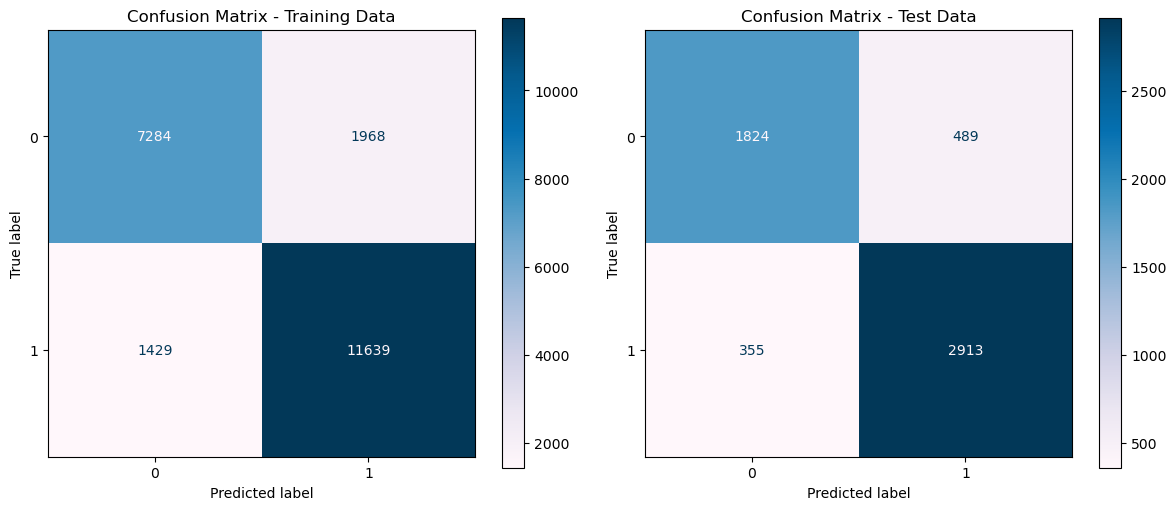

In [187]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(pipe_svm, X_train, y_train, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(pipe_svm, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

## b. Comparasion Table

In [188]:
# Create function to create reports
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate recall scores
    score_reports = {
        'Recall Train Set': recall_score(y_train, y_pred_train),
        'Recall Test Set': recall_score(y_test, y_pred_test),
    }

    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]

    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'SVC without Tuning')

pd.DataFrame(all_reports)

,SVC without Tuning
Recall Train Set,0.890649
Recall Test Set,0.891371
False Negative Train,1429.000000
False Negative Test,355.000000


Recall score pada model sudah menunjukan nilai yang begitu baik dan masuk dalam kategori goodfit, namun tahap selanjutnya adalah mencari kombinasi hyperparameter yang diharapkan dapat meningkatkan performa model, dan pada akhirnya akan dibandingkan base model dengan model yang sudah dituning. Hyperparameter tuning akan dilakukan dengan metode Grid Search dengan parameter yang digunakan adalah C, kernel dan gamma. Pada kali ini parameter kernel tidak akan menggunakan poly dikarenakan durasi GridSearch yang begitu lama, sehingga pada kali ini hanya akan membandingkan parameter kernel pada linear dan rbf.

## c. Grid Search

In [189]:
# Pipeline SVM
pipe_svm = Pipeline(steps=[
    ('drop', DropColumnsTransformer(drop_cols)),
    ('city_grouping', CityToRegionTransformer(city_to_region)),
    ('degree_grouping', DegreeMappingTransformer(degree_map)),
    ('preprocessing', preprocessor),
    ('classifier', SVC(probability=True))
])

# Parameter grid untuk GridSearchCV
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 0.01, 0.1, 1],
}

grid_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=param_grid_svm,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_svm.fit(X_train, y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)
print("Test Recall:", recall_score(y_test, grid_svm.predict(X_test)))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best CV Score: 0.8980721136826608
Test Recall: 0.8987148102815178


Hasil hyperparameter tuning dengan GridSearchCV menunjukan bahwa parameter terbaik adalah kombinasi C= 10, gamma = scale dan kernel rbf, untuk tahap selanjutnya adalah menguji apakah model yang sudah di tuning akan menghasilkan performa yang lebih baik dibandingkan dengan basenya

In [190]:
# Save Best SVM Model
best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


Pipeline(steps=[('drop',
                 DropColumnsTransformer(columns=['id', 'Gender', 'Profession',
                                                 'Work Pressure',
                                                 'Job Satisfaction'])),
                ('city_grouping',
                 CityToRegionTransformer(mapping={'Central': {'Bhopal',
                                                              'Indore',
                                                              'Nagpur'},
                                                  'East': {'Kolkata', 'Patna',
                                                           'Varanasi'},
                                                  'North': {'Agra', 'Delhi',
                                                            'Faridabad',
                                                            'Ghaziabad',
                                                  

## d. Model Evaluation After Tuning

In [191]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_pipe_svm.predict(X_train)
y_pred_test_tuned = best_pipe_svm.predict(X_test)

In [192]:
# Print recall score
print('Recall Score - Train Set  : ', recall_score(y_train, y_pred_train_tuned))
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_tuned))

Recall Score - Train Set  :  0.9021273339455158
Recall Score - Test Set   :  0.8987148102815178


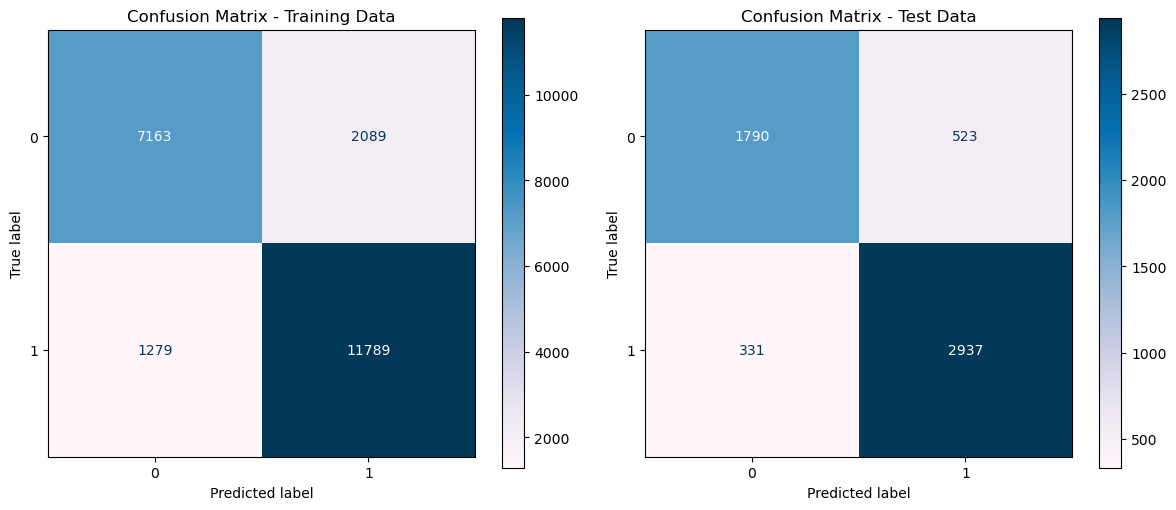

In [193]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(best_pipe_svm, X_train, y_train, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(best_pipe_svm, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

## e. Compare Before-After Tuning

In [194]:
# Add results to the report
all_reports = performance_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, 'SVC with Tuning')
pd.DataFrame(all_reports)

,SVC without Tuning,SVC with Tuning
Recall Train Set,0.890649,0.902127
Recall Test Set,0.891371,0.898715
False Negative Train,1429.000000,1279.000000
False Negative Test,355.000000,331.000000


Berdasarkan tabel perbandingan antara SVC base dengan yang sudah dituning menunjukan bahwa penerapan hyperparameter tuning mampu meningkatkan performa pada model SVC pada train maupun pada test nya. Recall meningkat dari 0.890649 menjadi 0.902127, sedangkan recall pada test set meningkat dari 0.891371 menjadi 0.898715. Hal ini menunjukkan bahwa model yang telah dituning lebih mampu mengenali kasus positif dibandingkan model tanpa tuning. Peningkatan recall ini juga tercermin dari penurunan jumlah false negative, yaitu kasus positif yang salah diprediksi sebagai negatif. Secara keseluruhan, tuning memberikan peningkatan kemampuan model dalam menangkap kelas target tanpa menyebabkan overfitting.

# ix. Model Saving

In [195]:
# Model Saving
pickle.dump(best_pipe_svm, open('model_svm.pkl', 'wb'))

# x. Conclusion

Pada program ini, tujuan utama yang ingin dicapai adalah memprediksi apakah seorang pelajar termasuk dalam kategori depresi atau tidak dengan menggunakan beberapa algoritma machine learning, diantaranya adalah Decision Tree, Logistic Regression, Random Forest, Support Vector Classifier (SVC), dan XGBoost. Proses evaluasi dilakukan menggunakan metrik Recall, karena fokus utama penelitian adalah meminimalkan jumlah __False Negative__, yaitu kasus pelajar yang sebenarnya mengalami depresi namun tidak terdeteksi oleh model. Hal ini penting karena kesalahan dalam bentuk False Negative berpotensi mengabaikan pelajar yang membutuhkan perhatian dan bantuan.

Berdasarkan hasil modeling dengan parameter basenya, setiap model menunjukkan performa yang bervariasi, model Logistic Regressin menunjukkan performa yang hampir sama, namun SVC menunjukkan performa model terbaik sehingga digunakan untuk modeling dan dilakukan hyperparameternya. Terdapat sedikit peningkatan pada model yang sudah dilakukan hyperparameter tuning, di mana recall pada data train dan test meningkat disertai penurunan jumlah false negative. Dengan demikian, model yang dihasilkan dapat digunakan sebagai alat bantu yang efektif dalam proses identifikasi dini terhadap risiko depresi pada pelajar, yang diharapkan dapat mencegah dampak dampak negatif yang ditimbulkan dari depresi yang tidak tertangani.

Kekurangan pada model ini adalah model hanya mempertimbangkan variabel-variabel yang tersedia dalam dataset, sehingga faktor eksternal lain yang berpotensi memengaruhi kondisi mental pelajar tidak tercakup dalam prediksi.

Adapun further improvement yang dilakukan adalah pada proses hyperparameter tuning, tambahkan kernel _poly_ yang terdapat kemungkinan dengan parameter tersebut dapat menjadi parameter terbaik untuk model SVC, dan penambahan variabel variabel yang berkorelasi dengan tingkat depresi yang diharapkan dapat meningkatkan performa model secara komprehensif. 